In [1]:
from utils import *
from collections import deque
from test import *
from examples import *

# Оболочка полилинии
Простой полилинией называется ломаная не имеющая самопересечений.
Далее мы научимся строить выпуклую оболочку полилинии за $O(n)$
![Пример](images/polyline.png)



## Алгоритм Мелькмана

Заведем дек, в котором будут поддерживаться 2 инварианта:
1. Вершины в деке – это вершины корректной выпуклой оболочки для всех рассмотренных вершин.
2. Последняя рассмотренная вершина лежит спереди и сзади дека (если она принадлежит текущей
оболочке).
Изначально дек инициализируется первыми тремя вершинами полилинии (очевидно, корректно).
Далее идем по вершинам в том порядке, в котором они соединены полилинией и, в зависимости от положения очередной добавляемой точки, изменяем дек.

Пусть у нас была дана полилиния $P={p_1, p_2, \dots, p_9, \dots}$.
Пускай мы уже построили оболочку для вершин $p_1, p_2,\dots, p_8$. При добавлении очередной вершины $p_9$ возможны случаи:

![Пример](images/polyline_var.png)

Заметим, что добавляемая точка не может "спряться" от текущей головной вершины позади всей оболочки
из-за несамопересекаемости полилинии.

![Пример](images/polyline_no.png)

Как изменяется дек?
1. Если добавляемая точка оказалась в позиции 4 (внутри текущей оболочки), то ничего делать ненадо. 
2. Если в позициях 1 или 3 – удаляем вершины с соответствующей стороны дека, пока не получится
корректный поворот.
3. В случае 2 удаляем по 1 вершине с обоих сторон дека.

В любом из случаев, в конце очередного шага необходимо положить эту вершину с обоих концов дека.

## Реализация

In [12]:
def melkman(points):
    d = deque()
    
    #Если точек меньше 3, то нет смысла делать что-то дальше
    if len(points) < 3:
        return d
    
    #Добавляем в дек первые три точки
    t = turn( points[1], points[0], points[2])
    if t == TURN_RIGHT:
        d.append(points[0])
        d.append(points[1])
    else :
        d.append(points[1])
        d.append(points[0])
    d.append(points[2])
    d.appendleft(points[2])
    
    #Идем по полилинии, обрабатывая новые вершины
    for i in  range(3, len(points)):
        l = len(d)
        #Шаг первый: если очередная точка лежит внутри уже имеющейся оболочки, то пропускаем ее
        if turn(d[0], points[i], d[1]) == TURN_RIGHT and turn(d[l - 1], d[l - 2], points[i]) == TURN_RIGHT:
            continue
            
        #Шаг второй: если очередная точка лежит слева от прямой, образованной двумя крайними точками,
        #лежащими на правой границе дека, то модифицируем дек
        while turn(d[l - 1], d[l - 2], points[i]) == TURN_LEFT:
            d.pop()
            l -= 1
        #Добавляем текущую точку в правый конец дека
        d.append(points[i])
        
        #Шаг третий: как на втором шаге, только для левого конца дека
        while turn(d[0], points[i], d[1]) == TURN_LEFT:
            d.popleft() 
        d.appendleft(points[i])
    return d


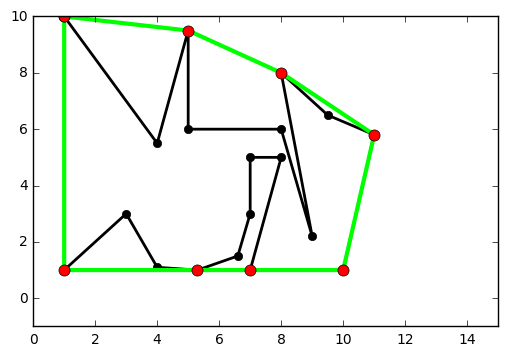

In [13]:
#Здесь можно посмотреть примеры работы
#example_melkman[i], где i может принимать значения от 0 до 3 - номер примера
points = example_melkman[1]
ans = list(melkman(points))
plot_melkman(points, ans)

## Корректность и время работы
Очевидно, что этот алгоритм работает за линейное время от количества точек в исходной полилинии, поскольку каждая вершина будет обработана (добавлена и удалена) один раз. 

Но почему алгоритм вообще работает? Для того, чтобы объяснить это, для начала вспомним свойства выпуклой оболочки $D$ для простой полигональной цепи $P$.
1. $D$ выпуклая
2. $P$ содержится в  $D$
3. Множество вершин, из которых состоит $D$ является подмножеством вершин полигональной цепи $P$

Доказательство корректности алгоритма строится на том, что следующее утверждение верно на протяженииобработки алгоритмом всей полилинии.

### Утверждение
> Дек $ D=(d_b,d_{b+1},....d_{t-1},d_{t})$ при добавлении очередной вершины полилинии содержит в себе корректную выпуклую оболочку уже рассмотренных вершин<br>
 
$\triangleright$<br>
<div style="padding-left:40px">
<b>База:</b> Та часть алгоритма, которая находится перед циклом `for` гарантирует, что утверждение верно для трех вершин.<br>
<b>Переход:</b> Предположим, что утверждение верно для $k$ вершин.<br>
Для начала заметим, что все вершины, которые мы пропускаем на <b>первом шаге</b> находятся внутри уже построенной выпуклой оболочки. 
Фактически, мы пропускаем очередную вершину, если она находится справа от ориентированых векторов $\mathbf{d_b d_{b+1}}$ и $\mathbf{d_{t-1}d_t}$. Более того, так как мы рассматриваем полилинию, то вершины $d_t$ и $v$ соединены, и, поскольку наша полилиния простая, ребро $\mathbf{vd_t}$ не пересекает ту часть полилинии, которая находится между $d_{b+1}$ и $d_{t-1}$. Следовательно, $v$ должна лежать внутри полигона, состоящего из вершин лежащих в $D$. 

Если же мы не пропускаем очередную вершину, то для нее можно предположить, что верно  $turn(d_b,d_{b+1},v)=TURN\_LEFT$ или $(d_{t-1},d_t,v)=TURN\_LEFT$ (или оба), а значит для нее выполнятся <b>второй</b> или <b>третий шаги</b>(или оба). <br>
Теперь представим, что у нас был дек $D=(d_b,...d_t)$, и после обработки очередной вершины $v$ полилинии $P$   получился новый дек $\widetilde{D}=(d_k,\dots,d_m)$, где $d_k=d_m=v$. Давайте докажем, что вышеописанные <b>условия 1, 2</b> и <b>3</b> выполняются для $\widetilde{D}$, а значит, $\widetilde{D}$ является корректной выпуклой оболочкой.

Выполнение <b>условия 3</b> очевидно, поскольку мы строим $\widetilde{D}$ из вершин $P$.<br>
Легко понять, что уже рассмотренный кусок полилинии $P$ содержится в $\widetilde{D}$, поскольку он содержался в $D$,а на втором и третьем шаге мы удаляли из дека только в том случае, если текущая вершина дека $d_k$ образует левый поворот с векторами $\mathbf{d_{t-1} v}$ и $\mathbf{v d_{b+1}}$ соответственно.<br>
Чтобы доказать,  что $\widetilde{D}$ выпуклый, покажем, что он образует замкнутую простую кривую, такую, что для нее верно $turn(d_i,d_{i+1},d_{i+2})\neq TURN\_LEFT$ для $i=k,\dots,m-2$, и $turn(d_{m-1},d_{m},d_{k+1})\neq TURN\_LEFT$. Поскольку $D$ образовывал простую полилинию, то $\widetilde{D}$ может иметь самопересечения только в случае, если  $\mathbf{vd_{k+1}}$ и $\mathbf{d_{m-1}v}$ пересекают ребра той части полилинии, по которой был постоен $D$, а такого не может быть, потому что сама $P$ изначально была простой. Тот же факт, что $turn(d_i,d_{i+1},d_{i+2})\neq TURN\_LEFT$ для $i=k,\dots,m-2$, был уже изначально верен для $D$ и является результатом выполнения <b>шагов два</b> и <b>три</b>. <br>
Докажем от противного, что  $turn(d_{m-1},d_{m},d_{k+1})\neq TURN\_LEFT$. Пусть $turn(d_{m-1},d_{m},d_{k+1})=TURN\_LEFT$  тогда вершина $v=d_m$ должна находиться справа от ориентированного ребра $\mathbf{d_{m-1}d_{k+1}}$, и в то же время должна находиться по правую сторону от полилинии $(d_{k+1},\dots,d_{m-1})$. Значит, что $v$ находится внутри $D$, и должна была быть отброшена на <b>шаге один</b>. Таким образом, <b>условия 1 и 2</b> также выполнены.
</div>
$\triangleleft$